In [20]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import os
import sys
sys.path.append("../")
from data import gestalt
from models import SAVi

In [4]:
savi = SAVi.SlotAttentionVideo(num_slots=4)

In [18]:
model_checkpoint_dir = "/om2/user/yyf/GestaltVision/saved_models/SAVI/tex=all_shapes=2,3_slots=4"
models = os.listdir(model_checkpoint_dir)
models.sort()

latest = models[-1]
model_chkpt = os.path.join(model_checkpoint_dir, latest)
chkpt = torch.load(model_chkpt, map_location="cpu")

In [19]:
savi.load_state_dict(chkpt["model"])

<All keys matched successfully>

In [95]:
data = gestalt.Gestalt(top_level=["voronoi"], sub_level=["superquadric_4"])
data.training = False
savi.eval()

3637 # training scenes, 403 # test scenes


SlotAttentionVideo(
  (encoder): Encoder(
    (conv1): Conv2d(3, 64, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (conv2): Conv2d(64, 64, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (conv3): Conv2d(64, 64, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (conv4): Conv2d(64, 64, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (pos_encoder): SoftPositionEmbedding(
      (embedding): Linear(in_features=4, out_features=64, bias=True)
    )
    (layer_norm): LayerNorm((64,), eps=1e-05, elementwise_affine=True)
    (mlp): Sequential(
      (0): Linear(in_features=64, out_features=64, bias=True)
      (1): ReLU()
      (2): Linear(in_features=64, out_features=64, bias=True)
    )
  )
  (decoder): Decoder(
    (conv1): ConvTranspose2d(64, 64, kernel_size=(5, 5), stride=(2, 2))
    (conv2): ConvTranspose2d(64, 64, kernel_size=(5, 5), stride=(2, 2))
    (conv3): ConvTranspose2d(64, 64, kernel_size=(5, 5), stride=(2, 2))
    (conv4): ConvTranspose2d(64, 64, kerne

In [96]:
batch = data.__getitem__(20)

In [97]:
images = batch["images"].unsqueeze(0)
masks = batch["masks"].unsqueeze(0)
flows = batch["flows"].unsqueeze(0)

In [98]:
out = savi(images, masks[:, :, 0])

In [99]:
recons = out["recons"].squeeze(0).detach().cpu().numpy()
masks = out["masks"].squeeze(0).detach().cpu().numpy()
slots = out["slots"].squeeze(0).detach().cpu().numpy()
recon_all = out["recon_combined"].squeeze(0).detach().cpu().numpy()

In [100]:
masks.shape

(6, 4, 128, 128, 1)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


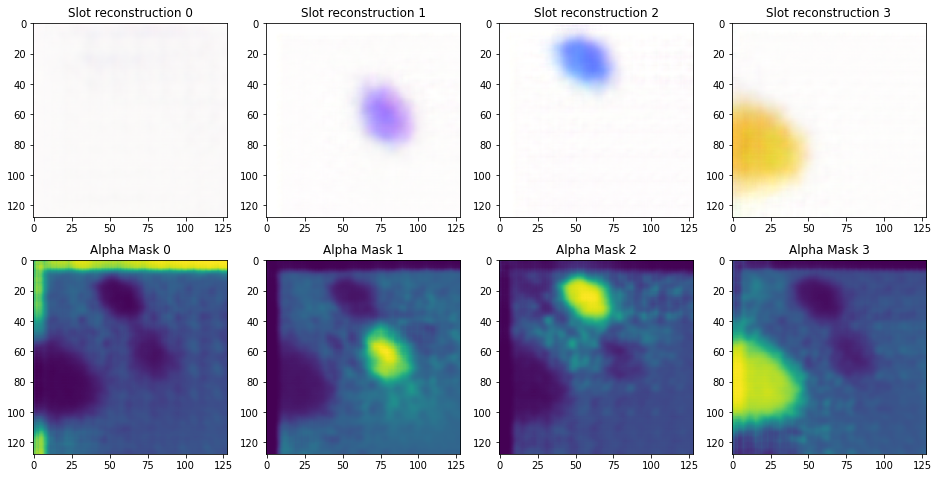

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


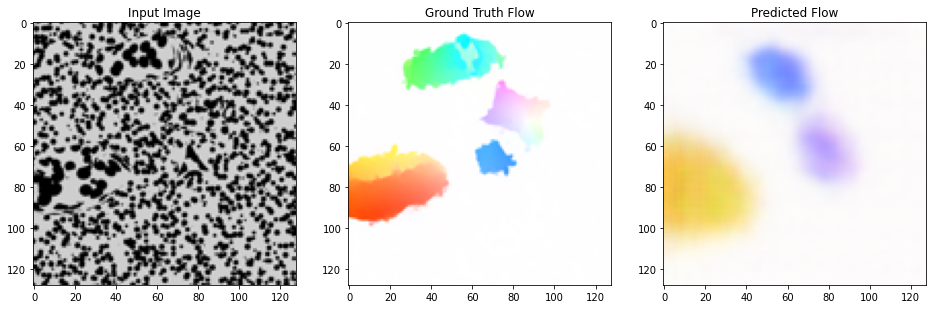

In [101]:
fig, axs = plt.subplots(2, 4, figsize=(16, 8))
for i in range(4):
    msk = masks[4, i]
    recon = recons[4, i]
    axs[1, i].imshow(msk)
    axs[0, i].imshow(recon)
    

    axs[0][i].set_title(f"Slot reconstruction {i}")
    axs[1][i].set_title(f"Alpha Mask {i}")

plt.show()

fig, axs = plt.subplots(1, 3, figsize=(16, 8))
axs[0].imshow(images.squeeze(0).cpu().numpy()[4].transpose(1, 2, 0))
axs[0].set_title("Input Image")

axs[1].imshow(flows.squeeze(0).cpu().numpy()[4].transpose(1, 2, 0))
axs[1].set_title("Ground Truth Flow")

axs[2].imshow(recon_all[4].transpose(1, 2, 0))
axs[2].set_title("Predicted Flow")

plt.show()